### Exercise 1

1) Load the breast_cancer dataset from skelarn (from sklearn.datasets import load_breast_cancer). Split the dataset into training and test datasets. Scale the dataset using minmaxscaler. Use KNeighborsClassifier classifier and report the score on the test dataset.

In [111]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

In [112]:
# split data into training and test datasets
X = load_breast_cancer().data
y = load_breast_cancer().target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

In [114]:
# scale using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [115]:
# use k neighbors classifier to report score
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [116]:
score = knn.score(X_test_scaled, y_test)
print("Test accuracy:", score)

Test accuracy: 0.951048951048951


2) Repeat Step 1 using pipelines and report the score.

In [117]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('knn', KNeighborsClassifier())
])

In [118]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()), ('knn', KNeighborsClassifier())])

In [119]:
pipeline_score = pipeline.score(X_test, y_test)
print("Pipeline test accuracy:", pipeline_score)

Pipeline test accuracy: 0.951048951048951


3) Use the pipeline object from Step 2 and make a grid search on parameter of number of neighbor. 

In [120]:
from sklearn.model_selection import GridSearchCV
param_grid = {'knn__n_neighbors': range(1, 11)}
grid_search = GridSearchCV(pipeline, param_grid, cv=5)

In [121]:
# find optimal knn
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': range(1, 11)})

In [122]:
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)
print("Test score:", grid_search.score(X_test, y_test))

Best parameters: {'knn__n_neighbors': 7}
Best cross-validation score: 0.9789603283173735
Test score: 0.958041958041958


4)	Import bike_day_raw.csv. Create a pipeline using ColumnTransformer, Scaling, and KNeighborsRegressor.

- Use `from sklearn.neighbors import KNeighborsRegressor'
- You need to split the data into X and y. 
- Check the data shape
- Check the data types
- Print the column names of the data frame
- Create a scatterplot of each feature against the target variable
- Create alist of features that are numeric and not numeric
- Create a pipeline of imputer and standard scaler for the numeric features
- Create a column transformer which uses the pipeline you created for numeric features and a onehotencoder for the non-numeric features
- You can create your column transformer in different ways
- Finally create a pipeline of column transformer and kNeighborsRegressor
- Split your data into train and test datasets
- Report the score on the test dataset



In [123]:
import pandas as pd
df = pd.read_csv('bike_day_raw.csv')
df.shape

(731, 11)

In [124]:
df.columns

Index(['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit',
       'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [125]:
df.dtypes

season          int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

In [126]:
df.head(5)

,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


In [127]:
X = df.drop('cnt', axis=1)
y = df['cnt']

In [128]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

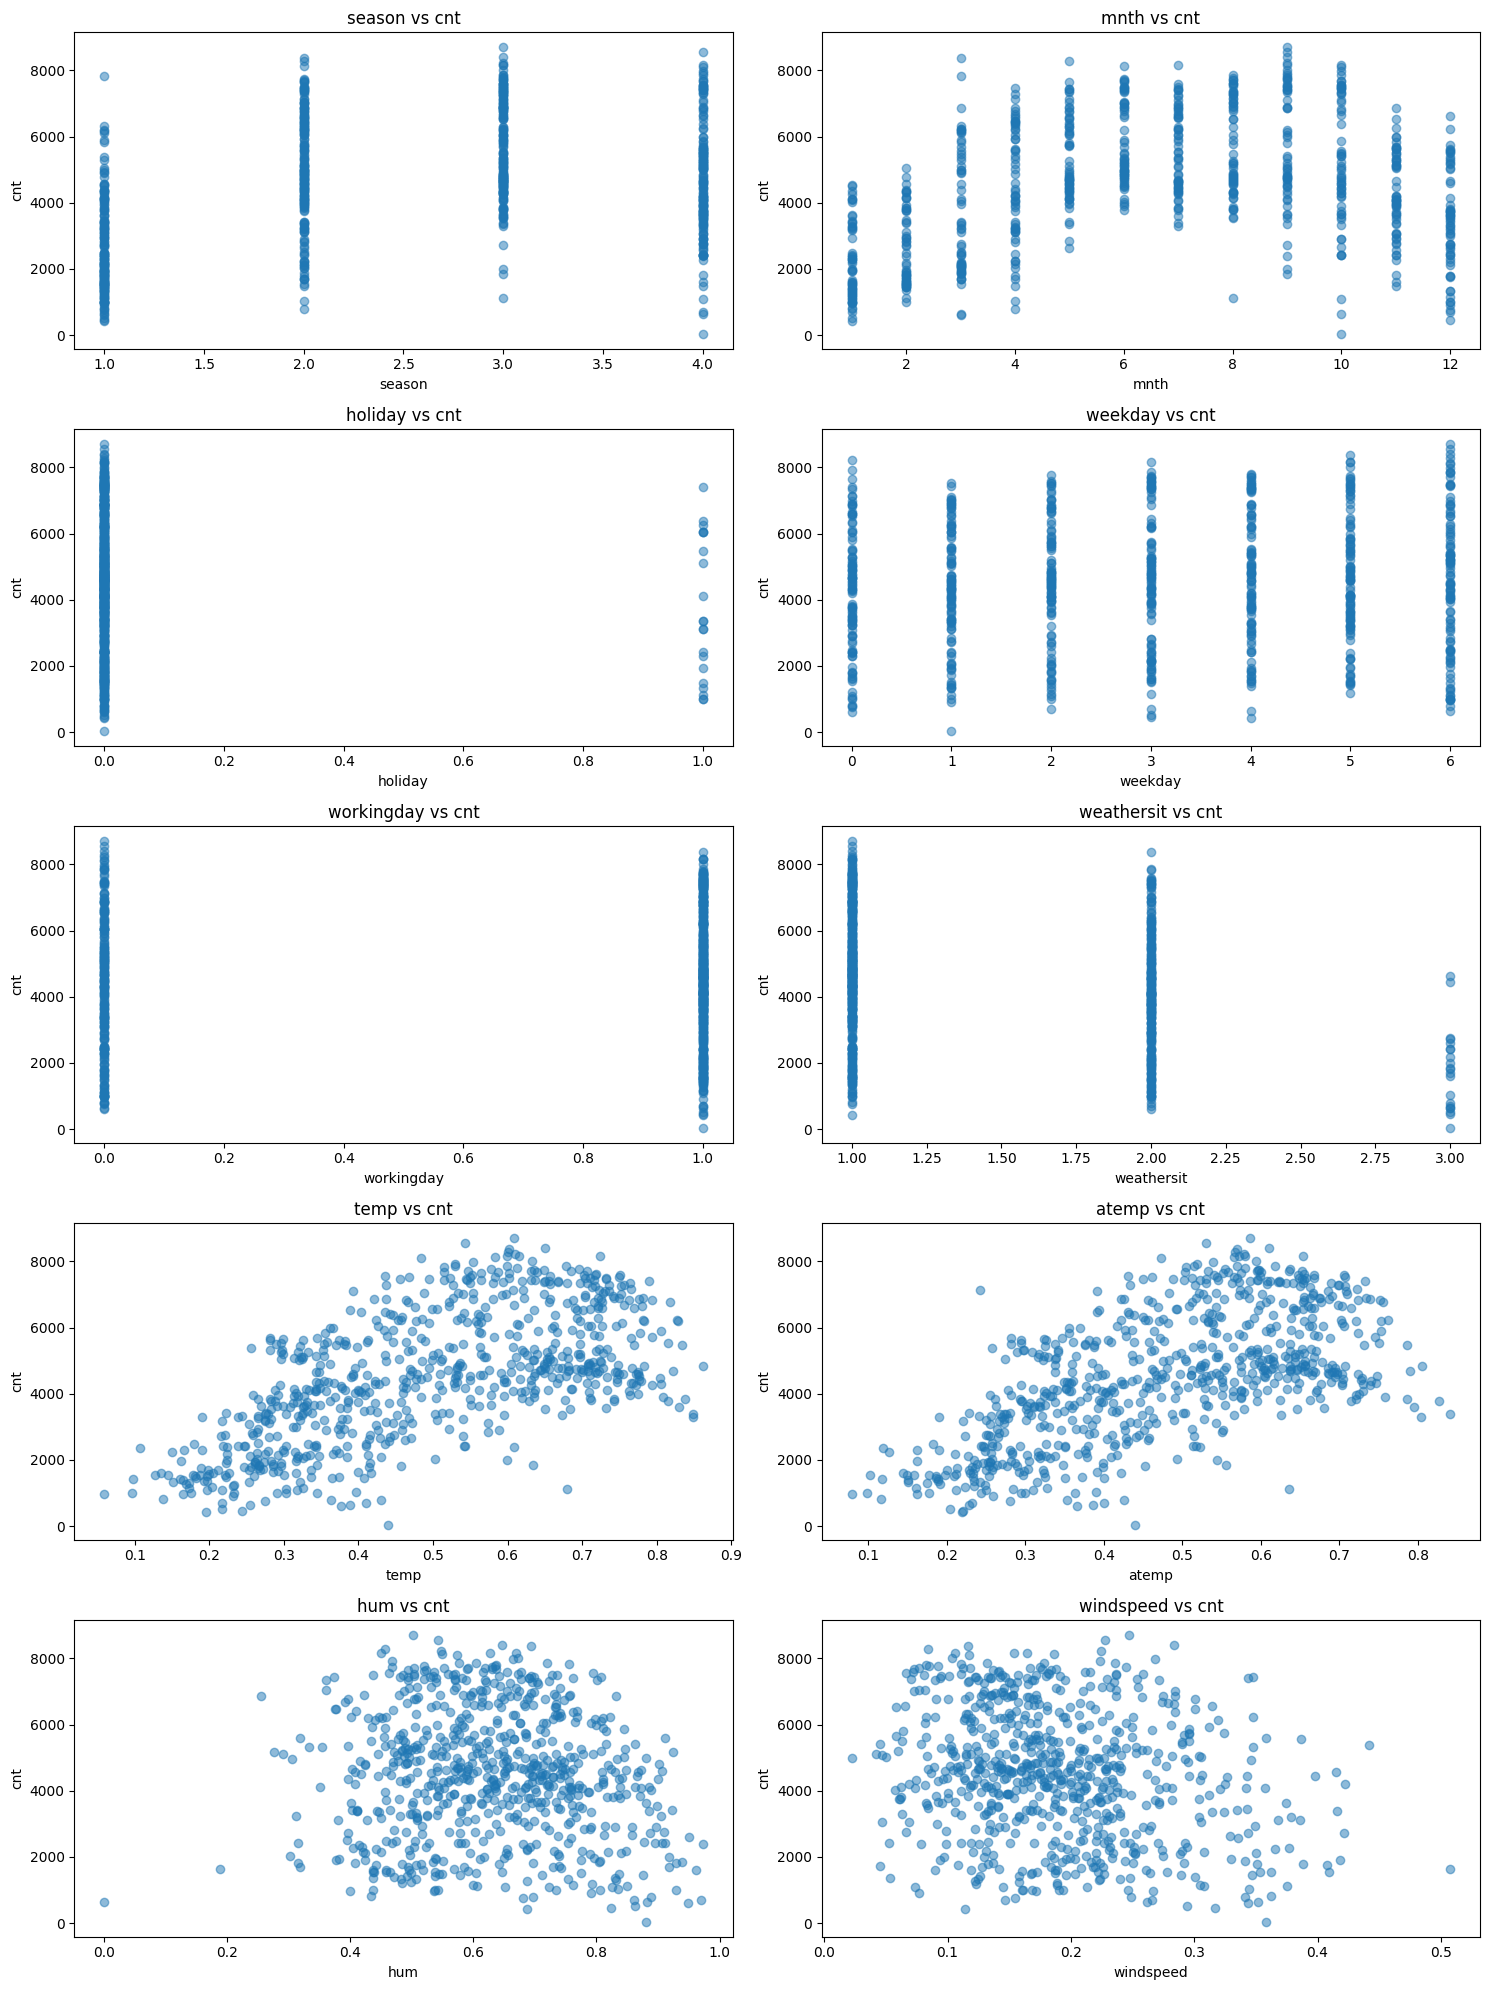

In [129]:
import matplotlib.pyplot as plt

# subplot for each feature against target variable
fig, axes = plt.subplots(5, 2, figsize=(15, 20))
axes = axes.ravel()

for idx, col in enumerate(X.columns):
    axes[idx].scatter(X[col], y, alpha=0.5)
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('cnt')
    axes[idx].set_title(f'{col} vs cnt')

plt.tight_layout()
plt.show()

In [130]:
# list of features that are numeric and not numeric
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

print("numeric features:", numeric_features)
print("categorical features:", categorical_features)

numeric features: ['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']
categorical features: []


In [131]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [132]:
# pipeline of imputer and standard scalar for numeric features
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [133]:
# column transformer using numeric pipeline and OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_features)
    ])

In [134]:
# pipeline of column transformer and KNeighborsRegressor
# this pipeline has already been preprocessed
pknn_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', KNeighborsRegressor())
])

In [135]:
# Split data into train and test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
#X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1)

In [136]:
pknn_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['season', 'mnth', 'holiday',
                                                   'weekday', 'workingday',
                                                   'weathersit', 'temp',
                                                   'atemp', 'hum',
                                                   'windspeed']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  [])])),
                ('regressor', KNeighborsRegressor())])

In [137]:
pknn_pipeline.score(X_test, y_test)

0.5817034081188185